## Emis3D example: Viewing SXR from Emis3D's standpoint 

In this example, we load the configuration files for each bolometer listed in the tokamak configuration file. The program will then plot the chords as well as the name of each chord. Emis3D matches each chord name to the same tag in the saved data. Therefore, it is important to make sure that the chords are in the correct toroidal and polodial location. 

Import the modules

Note: This example utilizes a 3D plot, to make it interactive within the jupyter shell use the following commands in your terminal shell: 
`pip install ipympl`

In [5]:
try:
    %matplotlib ipympl
except Exception:
    print("3D interactive plots are not supported in this environment. Using static plots instead.")
    
import os
import sys

# Ensure the parent directory is in the system path for module imports
sys.path.append(os.path.abspath("../.."))

import matplotlib.pyplot as plt
import numpy as np

from main.Tokamak import Tokamak
from main.Util import point3d_to_rz


#### Load the tokamak class

The tokamak class will look for the tokamak settings file within `/tokamaks/{DIII-D, SPARC, etc}/{DIII-D, SPARC, etc}_settings.yaml` where DIII-D, SPARC, etc. is the input `tokamakName`. The basic tokamak configuration file has basic (hopefully public) information such as volume, major radius, and a list of bolometers and the path to each configuration file specific to that bolometer. Currently, the program only supports one diode array for each bolometer. Therefore, if a bolometer contains a couple AXUV diodes, they will have to have their own configuration file. 

Important notes:
1. The code is hard-coded to look for the configuration file in the directory listed above. 
2. Each bolometer configuration file can be located somewhere else on your machine, and the path should be under each `configFileName`, e.g. `~/bolometers/test_bolometer_config.yaml`

In [6]:
# Load the tokamak and bolometers. An eq file is not required unless you want to plot the plasma
# wall and a `wallFileName` is not specified in the tokamak settings.

# We need to set the status to 'Build' in order to build the closed universe required for ratsect.
tok = Tokamak(
    tokamakName="DIII-D",
    mode="Build",
    loadBolometers=True,
)

#### Plot the chords in 3D

The tokamak class has a built-in feature to plot all of the chords in 3D. Here is it important to make sure that each bolometer is in the right toroidal location, since Emis3D uses a right-handed coordinate systems and tokamaks typically use a left-handed system. We will plot the poloidal cross-sections in the next step. 

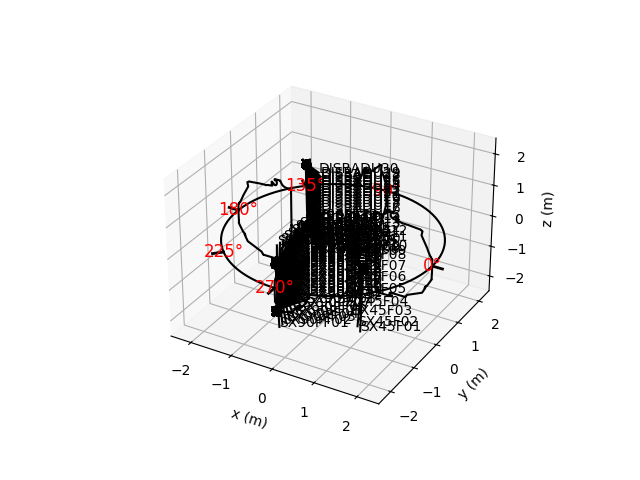

In [7]:
tok.plot()

#### Plot each individual bolometer

Green = from config file

Black = from Emis3D

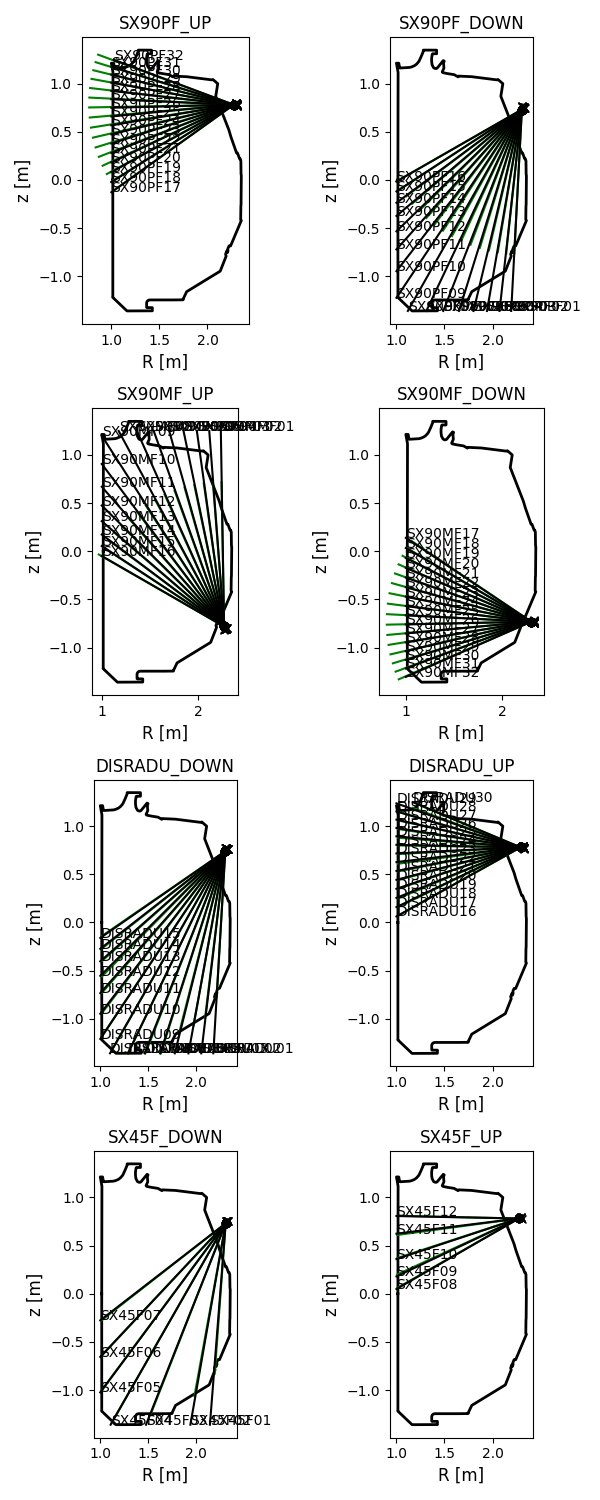

In [8]:
num_figs = len(tok.bolometers)
num_rows = int(np.ceil(num_figs / 4)) 
f = plt.figure(figsize=(6, 15))
for ii, bolo in enumerate(tok.bolometers):

    f_ = f.add_subplot(int(num_figs / num_rows),2, ii + 1)

    tok._plot_first_wall(f_)
    if "r0" in bolo.info:
        r0, z0, rf, zf = (
            bolo.info["r0"],
            bolo.info["z0"],
            bolo.info["rf"],
            bolo.info["zf"],
        )
        f_.plot([r0, rf], [z0, zf], color="green")
    for foil in bolo.bolometer_camera:
        slit_centre = foil.slit.centre_point
        slit_centre_rz = point3d_to_rz(slit_centre)
        f_.plot(slit_centre_rz[0], slit_centre_rz[1], "ko")
        origin, hit, _ = foil.trace_sightline()
        centre_rz = point3d_to_rz(foil.centre_point)
        f_.plot(centre_rz[0], centre_rz[1], "kx")
        origin_rz = point3d_to_rz(origin)
        hit_rz = point3d_to_rz(hit)
        f_.plot([origin_rz[0], hit_rz[0]], [origin_rz[1], hit_rz[1]], "k")
        f_.text(hit_rz[0], hit_rz[1], foil.name)
    f_.set_title(bolo.name)

plt.tight_layout()
plt.show()
